In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pandas as pd

# Máquinas Cuánticas de Soporte Vectorial.
Las máquinas de soporte vectorial son modelos de entrenamiento supervisado para la clasificación de datos. En este taller construiremos un clasificador clásico y uno cuántico para discriminar una característica de un dataset a elección.

## Problema 1: Dataset.

Construya datasets $(\vec{x}_{i},y_{i})$ y $(\vec{t}_{i},s_{i})$ para entrenar y testear un clasificador. Por ejemplo, pueden elegir y filtrar un dataset de [kaggle](https://www.kaggle.com/datasets). Estos datasets deben tener una característica bidimensional $\vec{x}_i$ ($\vec{t}_i$) y otra binaria $y_i$ ($s_i$). Además, el tamaño del set de entrenamiento $n_{train}$ debe estar entre 10 y 30, mientras que el de test $n_{test}$ debe ser 10. Haga un gráfico de estos datasets.

In [2]:
data = pd.read_csv('winequalityN.csv',sep=',')
print('Registros: {}'.format(data.shape[0]))
data.head(5)

Registros: 6497


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
data['label'] = data['type'].apply(lambda x: 1 if x=='white' else 0)
data = data[['volatile acidity','chlorides','label']]
data.head(5)

,volatile acidity,chlorides,label
0,0.27,0.045,1
1,0.30,0.049,1
2,0.28,0.050,1
3,0.23,0.058,1
4,0.23,0.058,1


In [18]:
def select_data_random(data, N, columns=['volatile acidity','chlorides'] ):
    """
    data    : dataset
    N       : numero de datos para el entrenamiento o el test.
    columns : columnas correspondientes a las caractesiticas que usaremos.

    X_train : N vectores bidimensionales
    Y_train : N cantidades binarias
    """

    n_datos = data.shape[0]
    
    index_train = np.random.randint(0, n_datos-1, N )
    data_train = data.loc[data.index.isin(index_train)]

    print(data_train.head(1))

    X = data_train[columns].to_numpy()
    Y = data_train['label'].to_numpy()
    return X, Y

In [19]:
N = 30
M = 10

np.random.seed(30)
X_train,Y_train = select_data_random(data,N)
X_test ,Y_test  = select_data_random(data,M)

    volatile acidity  chlorides  label
46              0.45      0.063      1
     volatile acidity  chlorides  label
186              0.24       0.04      1


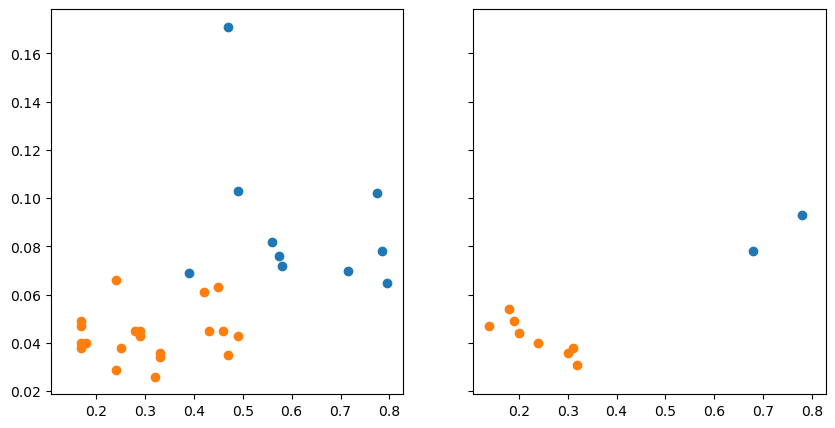

In [20]:
fig, axes = plt.subplots( 1,2 , figsize=( 10, 5 ), sharey = True, sharex = True )
axes[0].scatter( X_train[Y_train==0][:,0], X_train[Y_train==0][:,1] )
axes[0].scatter( X_train[Y_train==1][:,0], X_train[Y_train==1][:,1] )
axes[1].scatter( X_test[Y_test==0][:,0], X_test[Y_test==0][:,1] )
axes[1].scatter( X_test[Y_test==1][:,0], X_test[Y_test==1][:,1] )

## Problema 2: Kernel clásico.

Calcule el siguiente Kernel para sus datos

$$ K_{jk}(\vec{x}) = ( 1 + \vec{x}_j\cdot\vec{x}_k )^2, \qquad j,k = 1,\dots, n_{train} . $$

También calcule la matriz

$$ T_{jk}(\vec{x},\vec{t}) = ( 1 + \vec{t}_j\cdot\vec{x}_k )^2, \qquad j=1,\dots n_{test},\quad k=1,\dots,n_{train}. $$

para realizar el test del entrenamiento. Grafique estos Kernels.

In [8]:
def kernel_clasico( X_train, X_test=None ):
    """
    X_train : vector bidimensional para entrenar
    X_test  : vector bidimensional para testear
    K       : Kernel clasico
    """

    if X_test is None:
        X_test = X_train

    X_train = np.array(X_train)
    X_test  = np.array(X_test)
    K      = np.zeros(( X_test.shape[0], X_train.shape[0]))

    ######
    for j, x_test in enumerate( X_test ):
        for k, x_train in enumerate( X_train):
            K[j,k] = ( 1 + np.vdot( x_test, x_train ) )**2
    ######

    return K

In [9]:
K_train = kernel_clasico( X_train )
K_test  = kernel_clasico( X_train, X_test )

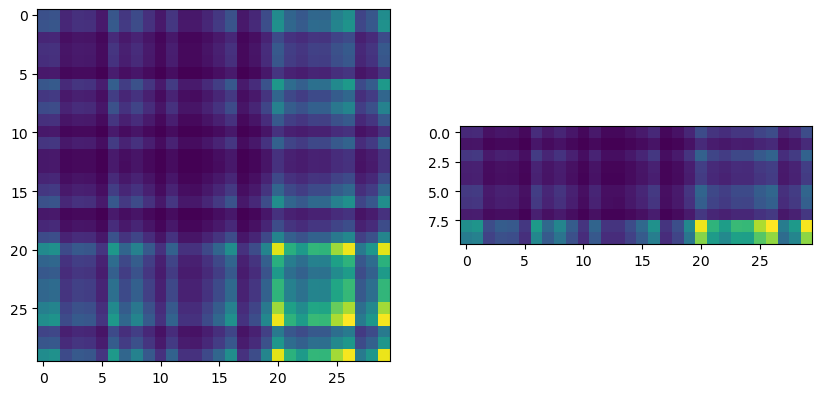

In [10]:
fig, ax = plt.subplots( 1, 2, figsize=(10,5) )
ax[0].imshow( K_train )
ax[1].imshow( K_test )

# Problema 3. Entrenamiento con Kernel clásico.
Entrene un discriminador con el dataset y el kernel clásico que construyó. Posteriormente, realice un test de su entrenamiento.

In [11]:
svm = SVC( kernel = 'precomputed' )
svm.fit( K_train, Y_train )
Y_predict = svm.predict( K_test )
print( 'Datos de entrenamiento:',  Y_test)
print( 'Predicción:            ',  Y_predict)
print( 'Fidelidad:             ', svm.score(K_test, Y_test) )

Datos de entrenamiento: [1 1 1 1 1 1 1 1 0 0]
Predicción:             [1 1 1 1 1 1 1 1 0 0]
Fidelidad:              1.0


## Problema 4: Codificación en un estado cuántico.

Cree una función  que tenga como argumento $\vec{x}$ bidimensional y como salida un circuito cuántico paramétrico evaluado en $\vec{x}$ a elección. Denotaremos el estado de este circuito como $|\phi(\vec{x})\rangle$. Como referencia puede utilizar el circuito de la siguiente figura, pero puede modificarlo si lo desea.

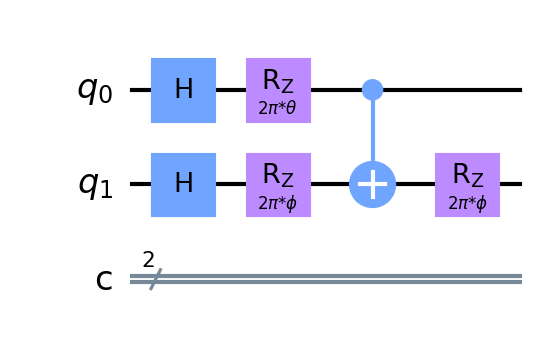

In [12]:
from qiskit import QuantumCircuit, Aer, execute

def circuit( x ):
    """
    x  : vector bidimensional
    qc : circuito cuantico
    """
    qc = QuantumCircuit(2, 2)

    ####
    qc.h([0,1])
    qc.rz( 2*np.pi*x[0], 0 )
    qc.rz( 2*np.pi*x[1], 1)
    qc.cx( 0, 1 )
    qc.rz( 2*np.pi*x[1], 1)

    ####

    return qc

C:\Users\Omar\anaconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


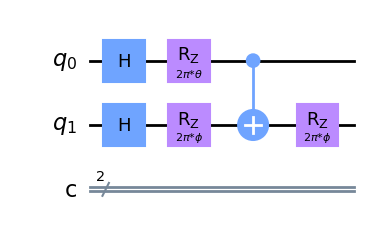

In [13]:
from qiskit.circuit import Parameter

theta = Parameter('$\\theta$')
phi = Parameter('$\\phi$')
qc1 = circuit( [ theta, phi ] )
qc1.draw('mpl')

## Problema 5: Kernel Cuántico.

Cree un programa capaz de evaluar el Kernel cuántico de los datos codificados en el estado $|\phi(\vec{x})\rangle$, es decir

$$  K_{jk}^Q =  | \langle \phi(\vec{x}_j) | \phi(\vec{x}_k)\rangle |^2, \qquad j,k = 1,\dots, n_{train}. $$

Esto requiere componer los circuitos de $\langle\phi(\vec{x}_j)|$ y $|\phi(\vec{x}_k)\rangle$, y después realizar una medida. Análogamente, evalue la matriz

$$  T_{jk}^Q =  | \langle \phi(\vec{t}_j) | \phi(\vec{x}_k) \rangle |^2, \qquad j= 1,\dots, n_{test},\quad k = 1,\dots, n_{train}. $$

Grafique ambas matrices.

In [14]:
def circuit_for_kernel_element(x_1, x_2 ):
    
    """ 
    x_1 : vector bidimensional
    x_2 : vector bidimensional
    qc  : circuito cuantico
    """

    qc = QuantumCircuit(2, 2)
    ####
    qc.compose( circuit(x_1), inplace=True )
    qc.compose( circuit(x_2).inverse(), inplace=True )
    qc.measure( range(2), range(2) )
    ####

    return qc

def Quantum_Kernel( X_train, X_test=None, backend=Aer.get_backend('statevector_simulator'), shots=1000 ):
    """ 
    X_train : vector bidimensional para entrenar
    X_test  : vector bidimensional para testear
    K_q     : Kernel cuantico
    backend : simulador o computador cuantico
    shots   : numero de shots     
    """

    if X_test is None:
        X_test = X_train
    X_train = np.array(X_train)
    X_test  = np.array(X_test)

    qcs = []
    for x_test in X_test:
        for x_train in X_train:
            qcs.append( circuit_for_kernel_element( x_train, x_test ) )

    ####
    job    = backend.run(qcs,shots=shots)#execute( qcs,backend )
    counts = job.result().get_counts() 
    ####

    K_q = np.zeros(( X_test.shape[0], X_train.shape[0]))
    ###
    l = 0
    for j, x_test in enumerate( X_test ):
        for k, x_train in enumerate( X_train):
            K_q[j,k] = float( counts[l]['00'] )/shots if '00' in counts[l] else 0
            l += 1
     ###

    return K_q

In [15]:
Kq_train = Quantum_Kernel( X_train )
Kq_test  = Quantum_Kernel( X_train, X_test )

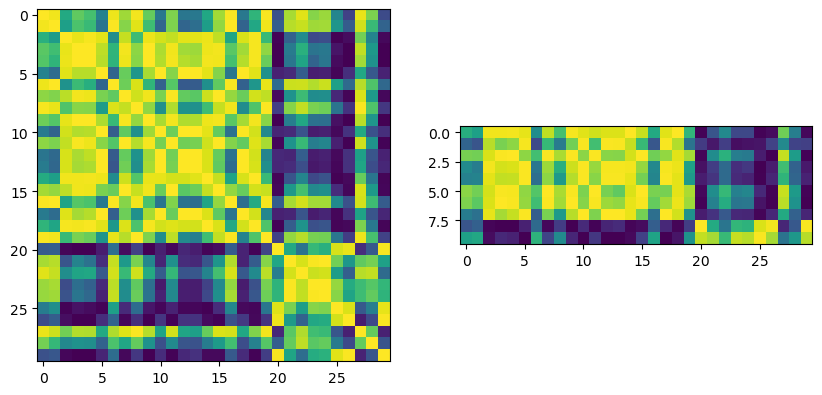

In [16]:
fig, ax = plt.subplots( 1, 2, figsize=(10,5) )
ax[0].imshow( Kq_train )
ax[1].imshow( Kq_test )

# Problema 6. Entrenamiento con Kernel Cuántico.
Entrene un discriminador con el dataset y el kernel cuántico que construyó. Posteriormente, realice un test de su entrenamiento.

In [17]:
svm = SVC( kernel = 'precomputed' )
svm.fit( Kq_train, Y_train )
Y_pred_quantum = svm.predict(Kq_test)
print( 'Datos de entrenamiento:',  Y_test)
print( 'Predicción:            ',  Y_pred_quantum)
print( 'Fidelidad:             ', svm.score(Kq_test, Y_test) )

Datos de entrenamiento: [1 1 1 1 1 1 1 1 0 0]
Predicción:             [1 1 1 1 1 1 1 1 0 0]
Fidelidad:              1.0
